<a href="https://colab.research.google.com/github/Marlianur09/Tugas_Praktikum_023_043/blob/main/Tugas_Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 2.9 MB/s 


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmarlianur","key":"81403f768f3dcbc9da268513b04c9ea1"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 73 Nov  8 09:49 kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
api_token = {"username":"muhammadmarlianur","key":"81403f768f3dcbc9da268513b04c9ea1"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [03:30<00:00, 34.7MB/s]
100% 9.51G/9.51G [03:30<00:00, 48.6MB/s]


In [8]:
!unzip \*.zip &> /dev/null && rm *.zip

In [9]:
!ls 


kaggle.json  sample_submission.csv  test_images  train_images
sample_data  test.csv		    train.csv


In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [11]:
train_dir = 'train_images'
test_dir = 'test_images'

In [12]:
train_csv=pd.read_csv('train.csv')
test_csv=pd.read_csv('test.csv')

In [13]:
train=[]
trainlabel=[]
for im in tqdm(os.listdir(train_dir)):
    image=load_img(os.path.join(train_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    train+=[image]
    trainlabel+=[train_csv[train_csv['id_code']==im[0:-4]]['diagnosis'].iat[0]]

100%|██████████| 3662/3662 [08:21<00:00,  7.30it/s]


In [14]:
test=[]
for im in tqdm(os.listdir(test_dir)):
    image=load_img(os.path.join(test_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]

100%|██████████| 1928/1928 [01:27<00:00, 22.14it/s]


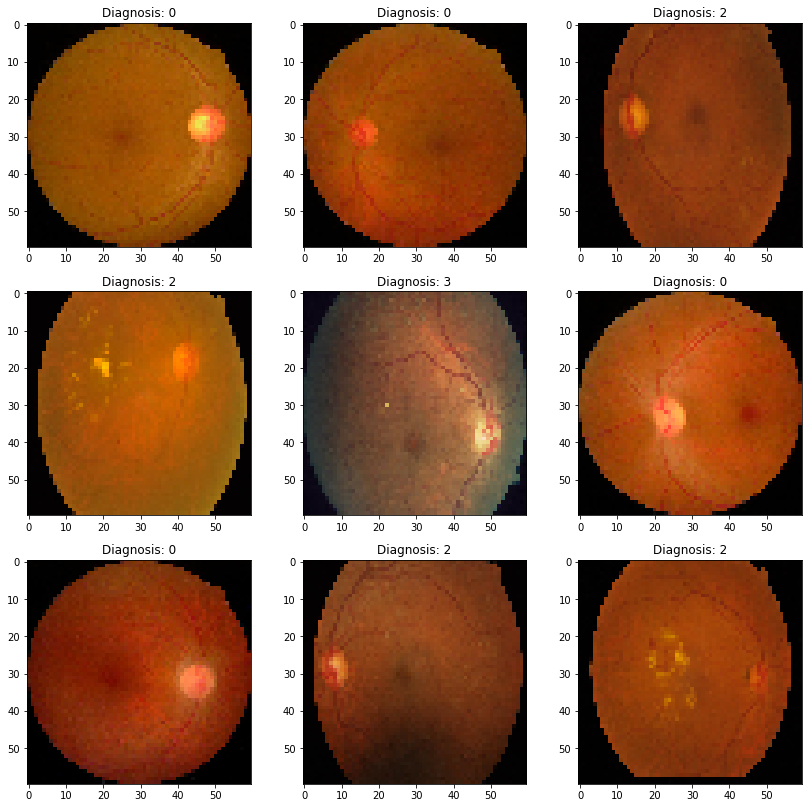

In [15]:
fig,axs = plt.subplots(3,3,figsize=(14,14))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].imshow(train[i])
    ax=axs[r][c].set_title('Diagnosis: '+str(trainlabel[i]))    
plt.show()

In [16]:
train=np.array(train)
trainlabel=np.array(trainlabel)
test=np.array(test)

In [17]:
trainlabel2=to_categorical(trainlabel)

In [18]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [20]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [40]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [43]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [45]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 39s 427ms/step - loss: 0.8250 - accuracy: 0.7033 - val_loss: 0.8527 - val_accuracy: 0.7067
Epoch 2/100
92/92 [==============================] - 40s 440ms/step - loss: 0.8489 - accuracy: 0.7019 - val_loss: 0.7841 - val_accuracy: 0.7231
Epoch 3/100
92/92 [==============================] - 39s 425ms/step - loss: 0.8263 - accuracy: 0.7050 - val_loss: 0.8229 - val_accuracy: 0.7190
Epoch 4/100
92/92 [==============================] - 39s 426ms/step - loss: 0.8206 - accuracy: 0.7105 - val_loss: 0.7989 - val_accuracy: 0.7190
Epoch 5/100
92/92 [==============================] - 39s 427ms/step - loss: 0.8154 - accuracy: 0.7088 - val_loss: 0.8811 - val_accuracy: 0.7012
Epoch 6/100
92/92 [==============================] - 39s 425ms/step - loss: 0.8048 - accuracy: 0.7163 - val_loss: 0.7860 - val_accuracy: 0.7149
Epoch 7/100
92/92 [==============================] - 39s 423ms/step - loss: 0.8089 - accuracy: 0.7078 - val_loss: 0.8440 - val_accuracy:

In [46]:
from keras.models import save_model
model.save('model3.1.h5')

In [47]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model2 = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])




In [48]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
his2=model2.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 43s 455ms/step - loss: 1.4986 - accuracy: 0.4732 - val_loss: 1.9533 - val_accuracy: 0.2865
Epoch 2/100
92/92 [==============================] - 42s 454ms/step - loss: 1.1872 - accuracy: 0.5756 - val_loss: 1.8618 - val_accuracy: 0.1323
Epoch 3/100
92/92 [==============================] - 41s 448ms/step - loss: 1.0795 - accuracy: 0.6203 - val_loss: 2.4818 - val_accuracy: 0.1623
Epoch 4/100
92/92 [==============================] - 41s 447ms/step - loss: 1.0244 - accuracy: 0.6398 - val_loss: 1.4316 - val_accuracy: 0.3670
Epoch 5/100
92/92 [==============================] - 41s 449ms/step - loss: 0.9874 - accuracy: 0.6374 - val_loss: 1.9422 - val_accuracy: 0.3015
Epoch 6/100
92/92 [==============================] - 41s 447ms/step - loss: 0.9400 - accuracy: 0.6651 - val_loss: 0.8695 - val_accuracy: 0.6794
Epoch 7/100
92/92 [==============================] - 41s 450ms/step - loss: 0.9279 - accuracy: 0.6767 - val_loss: 0.8730 - val_accuracy:

In [50]:
model2.save('model3.2.h5')

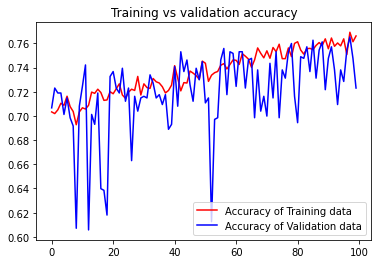

<Figure size 432x288 with 0 Axes>

In [58]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

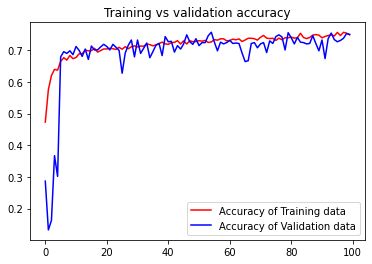

<Figure size 432x288 with 0 Axes>

In [59]:
get_acc2 = his2.history['accuracy']
value_acc2 = his2.history['val_accuracy']
get_loss2 = his2.history['loss']
validation_loss2 = his2.history['val_loss']

epochs = range(len(get_acc2))
plt.plot(epochs, get_acc2, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc2, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

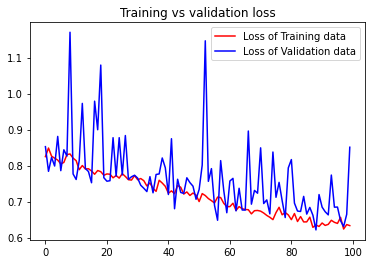

<Figure size 432x288 with 0 Axes>

In [60]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

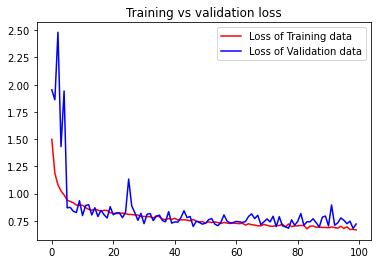

<Figure size 432x288 with 0 Axes>

In [61]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss2, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss2, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()